In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt

Vetor de pesos inicial:  [ 0.4284  0.3473 -0.2972]
Alterações no vetor de Pesos:  62000
Numero de Epocas 62
Vetor de Pesos no final [ 1.0077 -1.0059 -0.2935]


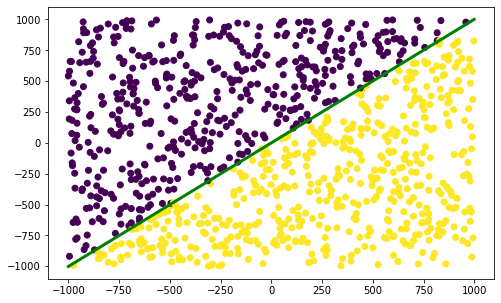

In [7]:
class Neuron():
    def __init__(self, arrayX, arrayY, weightArray):
        self.arrayX = arrayX
        self.arrayY = arrayY
        self.weightArray = weightArray
        self.learningRate = 0.0001
        self.epoch = 0
        self.fitCountWeight = 0
        self.changedWeight = 1
        
    
    def updateWeightArray(self, expectValue, obtainedValue, index):
        auxData = (self.learningRate*(expectValue - obtainedValue))*self.arrayX[index]
        self.weightArray = self.weightArray + auxData
        self.fitCountWeight+=1
        if(expectValue != obtainedValue):
            self.changedWeight = 1
        
        
    def training(self):
        while(self.changedWeight == 1):
            self.changedWeight = 0
            for i in range(len(self.arrayX)):
                u = np.inner(self.arrayX[i], self.weightArray)
#                 print(u)
                self.updateWeightArray(self.arrayY[i][0], 1 if u > 0 else 0, i)
            self.epoch += 1
            

        
    
with open('data/dataAll.txt', 'rb') as file:
    auxFile = file.read()

dataAll = np.frombuffer(auxFile)
dataAll.resize((int(len(dataAll)/3)), 3)

arrayX = dataAll[...,0:2] #[[x01,x02], ...]
arrayY = dataAll[...,2:] #[[yd0], [yd1], ...]


#adicionando x_0 no x(n)
arrayX = np.insert(arrayX, 2, 1, axis=1)



### gera vetor de pesos aleatoriamente e utilizá=los
weight = np.around(np.random.uniform(-0.5, 0.5, 3), 4) # gera 3, o ultimo é o bias


n = Neuron(arrayX, arrayY, weight)
n.training()
print("Vetor de pesos inicial: ",weight)
print("Alterações no vetor de Pesos: ", n.fitCountWeight)
print("Numero de Epocas", n.epoch)
print("Vetor de Pesos no final", np.around(n.weightArray,4))
x = [i for i in range(-len(dataAll),len(dataAll))]
y = [(n.weightArray[0]/n.weightArray[1]) * i * -1  - n.weightArray[2]/n.weightArray[0] for i in x]



plt.figure(figsize=(8, 5))
plt.plot(x,y, linewidth=3, c='g')
plt.scatter(arrayX[:,0], arrayX[:,1], c=arrayY, cmap='viridis')
plt.show()